<a href="https://colab.research.google.com/github/amanagr6697/House_Price_Prediction_Learning/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House** Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
#dataframe for independent
housing_df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
housing_df['Price']=dataset.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.5 MB/s 


In [4]:
#Exploratory Data Analysis
import sweetviz as sv

viewfile=sv.analyze(housing_df)
viewfile.show_html("./viewfile.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./viewfile.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 3.2 MB/s 


In [6]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#Converting latitude and longitude to locations(Feature Engineering)
from geopy.geocoders import Nominatim
import geocoder
geoidentifier=Nominatim(user_agent="geoapiExercises")
#details
# geoidentifier.reverse("37.86 ,	-122.22")
#for dictionary
# geoidentifier.reverse("37.86 ,	-122.22").raw
#for specific values
geoidentifier.reverse("37.86 ,	-122.22").raw["address"]

{'ISO3166-2-lvl4': 'US-CA',
 'city': 'Oakland',
 'country': 'United States',
 'country_code': 'us',
 'county': 'Alameda County',
 'leisure': 'Grizzly Peak Open Space',
 'postcode': '94618',
 'road': 'Charing Cross Road',
 'state': 'California'}

In [8]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
#Defining corelation coefficent to analyze data between different parts in a better way
correlation_coeff=housing_df.corr()

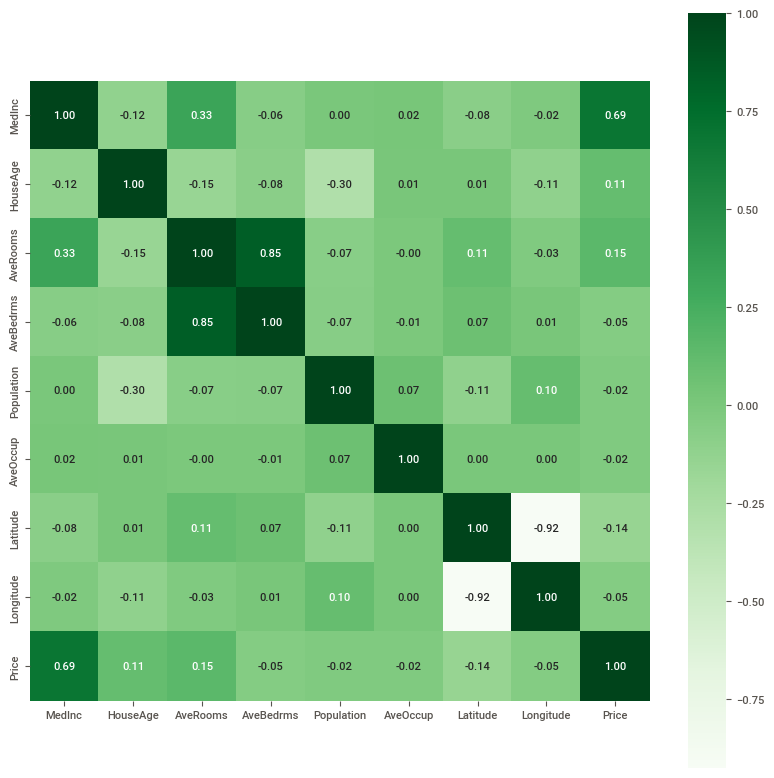

In [10]:
#plotting
plt.figure(figsize=(10,10))
sns.heatmap(correlation_coeff, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [ ]:
#Let's do some feature Engineering that is to modify labels and extract more meaning ful features as more features implies more accuracy(overfitting case would not be reached)
#details


def location_col_adding(coordinates):
  Latitude=str(coordinates[0])
  Longitude=str(coordinates[1])
  
  location=geoidentifier.reverse("37.86 ,	-122.22").raw["address"]
  # print(location)
  #To handle missing values and give them empty string to easily clean data later
  if location.get('road') is None:
    location['road']=None
  if location.get('county') is None:
    location['county']=None
  if location.get('Neighbourhood') is None:
    location['Neighbourhood']=None
  val_update['County'].append(location['county'])
  val_update['Road'].append(location['road'])
  val_update['Neighbourhood'].append(location['Neighbourhood'])
  return val_update

In [ ]:
import pickle
val_update={
    "County":[],
    "Road":[],
    "Neighbourhood":[]
}
for i,coordinates in enumerate(housing_df.iloc[:,6:-1].values,0):
  val_update=location_col_adding(coordinates)
  pickle.dump(val_update,open('val_update.pickle','wb'))
  if(i%100==0):
    print(i/100)

In [77]:
import pickle
val_update=pickle.load(open("/content/val_update.pickle",'rb'))
val_update.keys()

dict_keys(['County', 'Road', 'Neighbourhood'])

In [94]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [95]:
with open('/content/gdrive/My Drive/val_update.pickle', 'w') as f:
  f.write('content')

In [96]:
from google.colab import files
files.download( "/content/val_update.pickle" ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
val_dataframe=pd.DataFrame(val_update)
#As we see there are lots of NULL field in Neighbourhood hence we would remove that and latitude and longitude as well.
#Now to rectify many null field present in Road and County we would train the data set and then fill in those values as per trained data set as these are categorical data.

In [78]:
# For adding the newly generated columns in main dataframe
for i in val_update.keys():
  housing_df[i]=val_update[i]
    
#Randomizing rows in the dataframe
#axis=0->Row axis=1->Col
#fraction of rows to randomize
housing_df['Road'][100]=None
housing_df['Road'][1000]='Amanrocks'
housing_df['County'][100]=None
housing_df['County'][1000]='Hahaha'
housing_df.sample(axis=1,frac=1)
housing_df.info()
# np.unique(housing_df['HouseAge'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   Price          20640 non-null  float64
 9   County         20639 non-null  object 
 10  Road           20639 non-null  object 
 11  Neighbourhood  0 non-null      object 
dtypes: float64(9), object(3)
memory usage: 1.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

In [79]:
housing_df=housing_df.drop(labels=["Latitude","Longitude","Neighbourhood"],axis=1)

In [80]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price,County,Road
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526,Alameda County,Charing Cross Road
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585,Alameda County,Charing Cross Road
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521,Alameda County,Charing Cross Road
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413,Alameda County,Charing Cross Road
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422,Alameda County,Charing Cross Road


In [19]:
#We would use logistic regresiion to correct Road and County values by using available features as labels and these as y(i), logistic as these would take only certain values that is multiclass classification.
missing_indices=[] #stores those indices(row values)  


for i in range(housing_df.shape[0]):
   if housing_df['Road'][i] is None:
     missing_indices.append(i)
# Independent Parameters acting for dependent parameter road
missing_Road_x_train = np.array([ [housing_df [ 'MedInc'][i],housing_df['AveRooms'][i], housing_df['AveBedrms'][i] ] for i in range(housing_df.shape[0]) if i not in missing_indices ]) 
# Dependent parameter Road
missing_Road_y_train = np.array([ housing_df [ 'Road'][i] for i in range(housing_df.shape[0]) if i not in missing_indices ])
missing_Road_x_test = np.array([ [housing_df[ 'MedInc'][i],housing_df ['AveRooms'][i],housing_df['AveBedrms'][i] ] for i in range(housing_df.shape[0]) if i in missing_indices ])
labels=np.unique(missing_Road_y_train)
print(labels)

['Amanrocks' 'Charing Cross Road']


In [20]:
from sklearn.linear_model import SGDClassifier

#Training my model on datasets created above
#INstance
model_train=SGDClassifier()
#Parsing and training data
model_train.fit(missing_Road_x_train,missing_Road_y_train)

missing_Road_y_predicted=model_train.predict(missing_Road_x_test)

In [21]:
#Just to see how many unique values I got in my predicted set
np.unique(missing_Road_y_predicted)

array(['Charing Cross Road'], dtype='<U18')

In [22]:
for counter_from_0, missing_vals in enumerate(missing_indices,0):
  housing_df['Road'][missing_vals]=missing_Road_y_predicted[counter_from_0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
from sklearn.preprocessing import LabelEncoder
#Converts categorical values(string or other format) to numeric values
label_str=LabelEncoder()

housing_df['Road']=label_str.fit_transform(housing_df['Road'])

In [24]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price,County,Road
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526,Alameda County,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585,Alameda County,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521,Alameda County,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413,Alameda County,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422,Alameda County,1


In [25]:
#We would use logistic regresiion to correct Road and County values by using available features as labels and these as y(i), logistic as these would take only certain values that is multiclass classification.
missing_indices=[] #stores those indices(row values)  


for i in range(housing_df.shape[0]):
   if housing_df['County'][i] is None:
     missing_indices.append(i)
# Independent Parameters acting for dependent parameter road
missing_Road_x_train = np.array([ [housing_df [ 'MedInc'][i],housing_df['AveRooms'][i], housing_df['AveBedrms'][i] ] for i in range(housing_df.shape[0]) if i not in missing_indices ]) 
# Dependent parameter Road
missing_Road_y_train = np.array([ housing_df [ 'County'][i] for i in range(housing_df.shape[0]) if i not in missing_indices ])
missing_Road_x_test = np.array([ [housing_df[ 'MedInc'][i],housing_df ['AveRooms'][i],housing_df['AveBedrms'][i] ] for i in range(housing_df.shape[0]) if i in missing_indices ])
labels=np.unique(missing_Road_y_train)
print(labels)

['Alameda County' 'Hahaha']


In [26]:
from sklearn.linear_model import SGDClassifier

#Training my model on datasets created above
#INstance
model_train=SGDClassifier()
#Parsing and training data
model_train.fit(missing_Road_x_train,missing_Road_y_train)

missing_Road_y_predicted=model_train.predict(missing_Road_x_test)

In [27]:
for counter_from_0, missing_vals in enumerate(missing_indices,0):
  housing_df['County'][missing_vals]=missing_Road_y_predicted[counter_from_0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
from sklearn.preprocessing import LabelEncoder
#Converts categorical values(string or other format) to numeric values
label_str=LabelEncoder()

housing_df['County']=label_str.fit_transform(housing_df['County'])

In [29]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price,County,Road
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526,0,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585,0,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521,0,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413,0,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422,0,1


In [30]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Price       20640 non-null  float64
 7   County      20640 non-null  int64  
 8   Road        20640 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [65]:
housing_df=housing_df.sample(frac=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,County,Road,Prices
5050,0.8702,11.0,3.717262,0.931548,625.0,1.860119,0,1,1.091
10074,4.3958,9.0,6.645631,1.237864,1193.0,2.895631,0,1,1.625
17152,5.2391,22.0,5.029008,1.135878,1337.0,2.041221,0,1,2.441
10338,4.2564,25.0,5.592105,1.085526,4528.0,4.255639,0,1,1.586
18757,2.2120,10.0,5.207763,1.013699,1274.0,2.908676,0,1,1.918


In [81]:
y_val=housing_df.iloc[:,-3].values
housing_df.drop(labels=['Price'],axis=1,inplace=True)
x_val=housing_df.iloc[:,:].values
X_train, X_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.2, random_state=42)

In [60]:
#Training model and checking accuracy
from sklearn.ensemble import RandomForestRegressor
# housing_model=RandomForestRegressor()

from xgboost import XGBRegressor
housing_model=XGBRegressor()
housing_model.fit(X_train,y_train)


[21:55:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [57]:
final_val_test_predict=housing_model.predict(X_train)

In [59]:
#Check Accuracy
from sklearn import metrics

#Check R squared Accuracy percentage
r2score=metrics.r2_score(y_test,final_val_test_predict)*100
print(r2score)
#Check Mean Absolute Error percentage
meanabserror=metrics.mean_absolute_error(y_test,final_val_test_predict)*100
print(meanabserror)

71.40177321251292
45.031192252733625


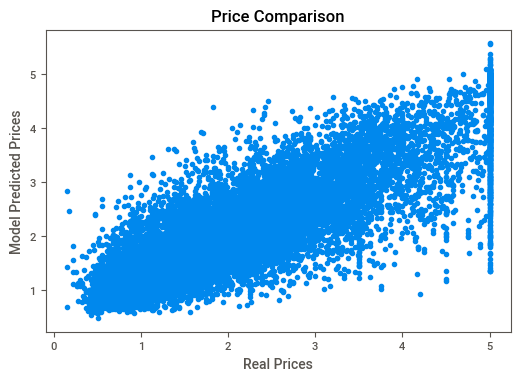

In [62]:
#Making Plot and checking
plt.scatter(y_train,final_val_test_predict)
plt.xlabel('Real Prices')
plt.ylabel('Model Predicted Prices')
plt.title('Price Comparison')
plt.show()

In [54]:
#To check our own data
input_data=np.array([5.6431,52.0,5.817352,1.073059,558.0,2.547945,0,1])
#To reshape before use as it is single sample
input_data=input_data.reshape((1,-1))
housing_model.predict(input_data)

array([3.8157527], dtype=float32)

In [44]:
input_data

array([[  5.6431  ,  52.      ,   5.817352,   1.073059, 558.      ,
          2.547945,   0.      ,   1.      ]])

In [98]:
#Without removing Latitude and Longitude that is without feature Engineering
housing_df_without=pd.DataFrame(dataset.data,columns=dataset.feature_names)
housing_df_without['Prices']=dataset.target
housing_df_without.head()


y_val_without=housing_df_without.iloc[:,-3].values
housing_df_without.drop(labels=['Prices'],axis=1,inplace=True)
x_val_without=housing_df_without.iloc[:,:].values
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(x_val_without, y_val_without, test_size=0.2, random_state=42)

housing_model_without=XGBRegressor()
housing_model_without.fit(X_train_without,y_train_without)

[22:13:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [99]:
final_val_test_predict_without=housing_model_without.predict(X_test_without)

In [100]:
r2score_without=metrics.r2_score(y_test_without,final_val_test_predict_without)*100
print(r2score_without)

99.99419444915222


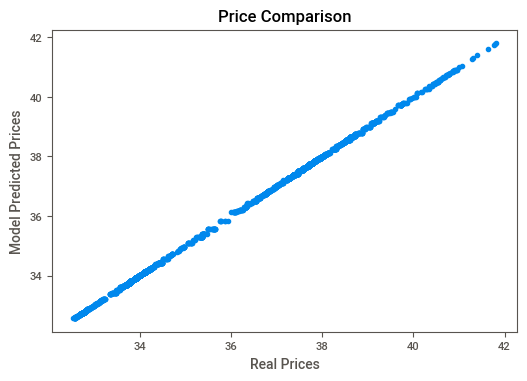

In [102]:
plt.scatter(y_test_without,final_val_test_predict_without)
plt.xlabel('Real Prices')
plt.ylabel('Model Predicted Prices')
plt.title('Price Comparison')
plt.show()

Learnt about Feature Engineering, different libraries, plotting, cleaning data, data visualisation, exploratory data analysis